Trying out another Clustering technique

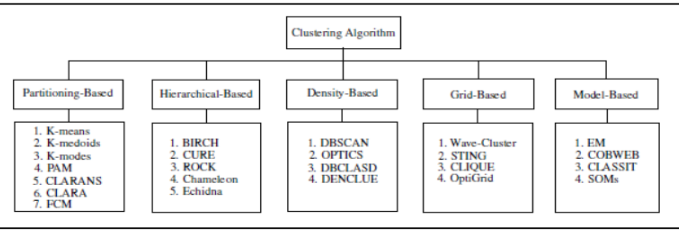

Hierarchical-Based Clustering Algorithm: Agglomerative Hierarchical Clustering

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('A2Z_insurance.csv')

In [3]:
df['Premiums Sum'] = df['Premiums in LOB: Motor'] +  df['Premiums in LOB: Household'] + df['Premiums in LOB: Health'] + df['Premiums in LOB:  Life'] + df['Premiums in LOB: Work Compensations']

df.head()

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Premiums Sum
0,1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56
1,2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,910.96
2,3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24


In [4]:
df['Amount Paid by the Insurance Company'] = df['Claims Rate'] * df['Premiums Sum']

In [5]:
#Age Columns
df['Age'] = 2016 - df['Brithday Year']
df['Age As Client'] = 2016 - df['First Policy´s Year']

df.head()

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Premiums Sum,Amount Paid by the Insurance Company,Age,Age As Client
0,1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56,259.5684,34.0,31.0
1,2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,910.96,1020.2752,21.0,35.0
2,3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60,207.3680,46.0,25.0
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68,594.6732,35.0,26.0
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24,566.3160,43.0,30.0


In [21]:
df.head()

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Premiums Sum,Amount Paid by the Insurance Company,Age,Age As Client,Annual Salary
0,1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56,259.5684,34.0,31.0,26124.0
1,2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,910.96,1020.2752,21.0,35.0,8124.0
2,3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60,207.3680,46.0,25.0,27324.0
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68,594.6732,35.0,26.0,13188.0
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24,566.3160,43.0,30.0,21156.0


In [6]:
df = df.dropna()

In [8]:
df['Annual Salary'] = df['Gross Monthly Salary']*12
df[df['Premiums Sum'] > df['Annual Salary']]
df = df.drop(df.index[9149])

In [9]:
var_cluster = df[['Premiums in LOB:  Life',
                'Premiums in LOB: Health',
                'Premiums in LOB: Household',
                'Premiums in LOB: Motor',
                'Premiums in LOB: Work Compensations']]

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
CA_Norm = scaler.fit_transform(var_cluster)
CA_Norm = pd.DataFrame(var_cluster, columns = var_cluster.columns)

Plotting the the Dendrogram

In [11]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from pylab import rcParams

In [12]:
import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [15]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')

<Figure size 720x360 with 0 Axes>

In [16]:
# Scipy generate dendrograms
Z = linkage(CA_Norm, method='ward')

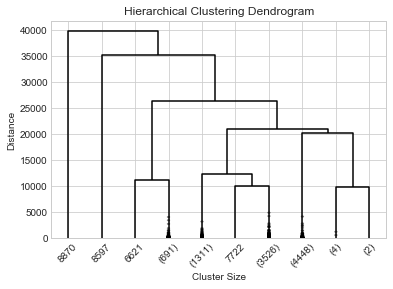

In [20]:
dendrogram(Z,
          truncate_mode='lastp',
          p=10,
          orientation='top',
          leaf_rotation=45.,
          leaf_font_size=10.,
          show_contracted=True,
          show_leaf_counts=True, color_threshold=50, above_threshold_color='k')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [ ]:
k = 3
Hclustering = AgglomerativeClustering(n_clusters=3,
                                     affinity='euclidean',
                                     linkage='ward')

# replace the test with proper data
my_HC = Hclustering.fit(CA_Norm)
my_labels = pd.DataFrame(my_HC.labels_)
my_labels.columns = ['labels'] # TODO: fill in 

Affinity = pd.DataFrame(pd.concat([pd.DataFrame(CA_Norm), my_labels], axis=1), columns=df.columns)
to_revert = Affinity.groupby('') # TODO: fill in
final_result = pd.DataFrame(scaler.invse_transform(X=to_revert), columns=df.columns)

In [27]:
linked = linkage(var_cluster, 'single')
labelList = range(len(var_cluster))
plt.figure(figsize=(10,7))
dendrogram(linked,
          orientation='top',
          labels=labelList,
          distance_sort='descending',
          show_leaf_counts=True)
plt.show()

RecursionError: maximum recursion depth exceeded in comparison

<Figure size 720x504 with 0 Axes>